In [1]:
from datasets.bimcvcovid import BIMCVCOVIDDataset
from datasets.bimcvnegative import BIMCVNegativeDataset
from datasets.domainconfoundeddatasets import DomainConfoundedDataset
from train_covid import ds3_grouped_split

seed = 42

trainds = DomainConfoundedDataset(
        BIMCVNegativeDataset(fold='all', labels='chestx-ray14', random_state=seed),
        BIMCVCOVIDDataset(fold='all', labels='chestx-ray14', random_state=seed)
        )
valds = DomainConfoundedDataset(
        BIMCVNegativeDataset(fold='all', labels='chestx-ray14', random_state=seed),
        BIMCVCOVIDDataset(fold='all', labels='chestx-ray14', random_state=seed)
        )
# split on a per-patient basis
trainvaldf1, testdf1, trainvaldf2, testdf2 = ds3_grouped_split(trainds.ds1.df, trainds.ds2.df, random_state=seed)
traindf1, valdf1, traindf2, valdf2 = ds3_grouped_split(trainvaldf1, trainvaldf2, random_state=seed)

# Update the dataframes to respect the per-patient splits
trainds.ds1.df = traindf1
trainds.ds2.df = traindf2
valds.ds1.df = valdf1
valds.ds2.df = valdf2
trainds.len1 = len(trainds.ds1)
trainds.len2 = len(trainds.ds2)
valds.len1 = len(valds.ds1)
valds.len2 = len(valds.ds2)

In [91]:
print(len(traindf1), len(traindf2))
print(len(valdf1), len(valdf2))

2832 1564
184 70


In [2]:
import matplotlib.pyplot as plt
import numpy as np

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

def show_image(image, label, path):
    img = image.numpy().transpose((1, 2, 0))  # numpy is [h, w, c] 
    _mean = np.array(mean)  # mean of your dataset
    _std = np.array(std)  # std of your dataset
    img = _std * img + _mean

    print(f"Path: {path}")
    if label[14] == 1:
        print("Covid-19")
    else:
        print("Healthy")
    plt.imshow(img)

In [87]:
dataset = valds.ds2
i = 70
img, y, _, _ = dataset.__getitem__(i)
path = dataset.df.path.iloc[i].split('/')[-1]

show_image(img, y, path)

IndexError: single positional indexer is out-of-bounds

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Path: sub-S05026_ses-E09976_run-1_bp-chest_vp-ap_dx.png
Healthy


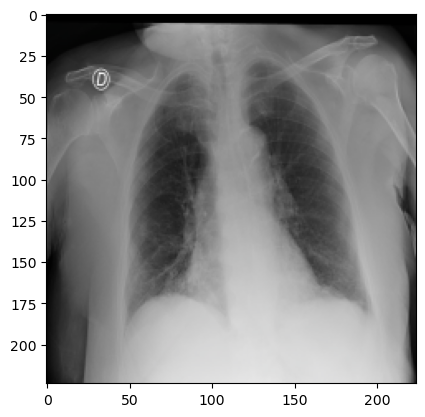

In [44]:
dataset = valds.ds1
i = 3
img, y, _, _ = dataset.__getitem__(i)
path = dataset.df.path.iloc[i].split('/')[-1]

show_image(img, y, path)

In [2]:
from pathlib import Path
import torch
from PIL import Image
import numpy as np

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]


def save_image(image_name):
    path = Path("data", "tensors", "bimcv+", image_name)
    image = torch.load(path, weights_only=True)

    img = image.numpy().transpose((1, 2, 0))  # numpy is [h, w, c] 
    _mean = np.array(mean)  # mean of your dataset
    _std = np.array(std)  # std of your dataset
    img = _std * img + _mean

    Image.fromarray((img * 255).astype(np.uint8)[:, :, 0], mode="L").save(f"images/{image_name.split('.')[0]}.png")
files = [
    "sub-S04039_ses-E08212_run-1_bp-chest_vp-ap_dx.pt",
    "sub-S04389_ses-E08727_run-1_bp-chest_vp-pa_cr.pt",
    "sub-S03850_ses-E07763_run-1_bp-chest_vp-ap_dx.pt",
    "sub-S03996_ses-E08157_run-1_bp-chest_vp-pa_cr.pt",
    "sub-S03577_ses-E08875_run-1_bp-chest_vp-ap_cr.pt",
    "sub-S03462_ses-E06928_run-1_bp-chest_vp-pa_dx.pt",
    "sub-S03754_ses-E08345_run-1_bp-chest_dx.pt",
    "sub-S04492_ses-E08924_run-1_bp-chest_vp-pa_cr.pt",
    "sub-S03349_ses-E06615_run-1_bp-chest_vp-pa_dx.pt",
    "sub-S03349_ses-E07087_acq-2_run-1_bp-chest_vp-ap_cr.pt",
    "sub-S04179_ses-E08410_run-1_bp-chest_vp-pa_cr.pt",
    "sub-S03352_ses-E07961_run-1_bp-chest_vp-pa_dx.pt",
    "sub-S04503_ses-E08941_run-1_bp-chest_vp-pa_dx.pt",
    "sub-S04401_ses-E08746_run-1_bp-chest_vp-pa_cr.pt",
    "sub-S03732_ses-E07553_run-1_bp-chest_vp-pa_cr.pt",
    "sub-S04070_ses-E08245_run-1_bp-chest_vp-pa_cr.pt",
    "sub-S03782_ses-E07622_run-1_bp-chest_vp-pa_cr.pt",
    "sub-S03993_ses-E08154_run-1_bp-chest_vp-pa_cr.pt",
    "sub-S03188_ses-E07452_run-1_bp-chest_vp-ap_dx.pt",
    "sub-S03453_ses-E06906_run-1_bp-chest_vp-ap_cr.pt",
    "sub-S04202_ses-E08439_run-1_bp-chest_vp-pa_cr.pt",
    "sub-S04023_ses-E08671_run-1_bp-chest_vp-pa_cr.pt",
    "sub-S03066_ses-E07113_run-1_bp-chest_vp-pa_dx.pt",
    "sub-S04363_ses-E08681_run-1_bp-chest_vp-pa_cr.pt",
    "sub-S04265_ses-E08519_run-1_bp-chest_vp-pa_cr.pt",
    "sub-S03082_ses-E07936_run-1_bp-chest_vp-ap_dx.pt",
    "sub-S03306_ses-E06508_run-1_bp-chest_vp-pa_dx.pt",
    "sub-S03528_ses-E07162_run-1_bp-chest_vp-ap_cr.pt",
    "sub-S03805_ses-E07670_run-1_bp-chest_vp-pa_cr.pt",
]

for name in files:
    save_image(name)